In [1]:
#Imports
import numpy as np
from sympy import symbols
import math
import cmath 

import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
#solving for a,b,c

# Constants and given values
M = 23261.81 #meV
m = 940.60 #mev 
θ = 1 #degrees
Ea = 1 #meV
Q =-0.47834 #meV
ma = 3727.3794066 #meV
pxa=np.sqrt((2*ma)*Ea)

#Equations for a,b,c
a =  (1 / (2 * M)) + (math.tan(math.radians(θ))**2 / (2 * M)) + (1 / (2 * m)) + (math.tan(math.radians(θ))**2 / (2 * m)) 
b = -pxa / M 
c = (pxa**2 / (2 * M)) - Ea - Q

#solve
print(a)
print(b)
print(c)

0.0005532385571232741
-0.0037117036538443456
-0.3614239991642956


In [3]:
# function for finding roots  
def findRoots(a, b, c):  
  
    dis_form = b * b - 4 * a * c  
    sqrt_val = math.sqrt(abs(dis_form))  
  
  
    if dis_form > 0:  
        #print(" real and different roots ")  
        #print((-b + sqrt_val) / (2 * a))  
        #print((-b - sqrt_val) / (2 * a))  
  
        r1=((-b + sqrt_val) / (2 * a))  
        r2=((-b - sqrt_val) / (2 * a))

    elif dis_form == 0:  
        #print(" real and same roots")  
        #print(-b / (2 * a))  
  
        r1=(-b / (2 * a))
        r2=(-b / (2 * a))
  
    else:  
        #print("Complex Roots")  
        #print(- b / (2 * a), " + i", sqrt_val)  
        #print(- b / (2 * a), " - i", sqrt_val)  
  
        r1=(- b / (2 * a), " + i", sqrt_val)  
        r2=(- b / (2 * a), " - i", sqrt_val)
  
    return [r1,r2]
#a = float(input('Enter a:'))  
#b = float(input('Enter b:'))  
#c = float(input('Enter c:'))  
  
# If a is 0, then incorrect equation  
if a == 0:  
    print("Input correct quadratic equation")  
  
else:  
    findRoots(a, b, c)   

In [4]:
#Theta 
Theta=np.linspace(0,90,10)
print (Theta)

[ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]


In [5]:
p = np.zeros(np.shape(Theta)) 
print(p)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
#https://realpython.com/python-enumerate/
for i , t in enumerate(Theta):
    
    print(i,t)
    θ = t #degrees
    a =  (1 / (2 * M)) + (math.tan(math.radians(θ))**2 / (2 * M)) + (1 / (2 * m)) + (math.tan(math.radians(θ))**2 / (2 * m)) 
    b = -pxa / M 
    c = (pxa**2 / (2 * M)) - Ea - Q
    print(findRoots(a,b,c)[0])  
    p[i] = findRoots(a,b,c)[0]

0 0.0
29.13822456571937
1 10.0
28.638860571826616
2 20.0
27.16680003598321
3 30.0
24.797788190683114
4 40.0
21.650558971945575
5 50.0
17.876646280487417
6 60.0
13.648080037381531
7 70.0
9.144524872715738
8 80.0
4.541370954797508
9 90.0
1.5653061075588826e-15


In [7]:
#results of p in x direction
print(p)

[2.91382246e+01 2.86388606e+01 2.71668000e+01 2.47977882e+01
 2.16505590e+01 1.78766463e+01 1.36480800e+01 9.14452487e+00
 4.54137095e+00 1.56530611e-15]


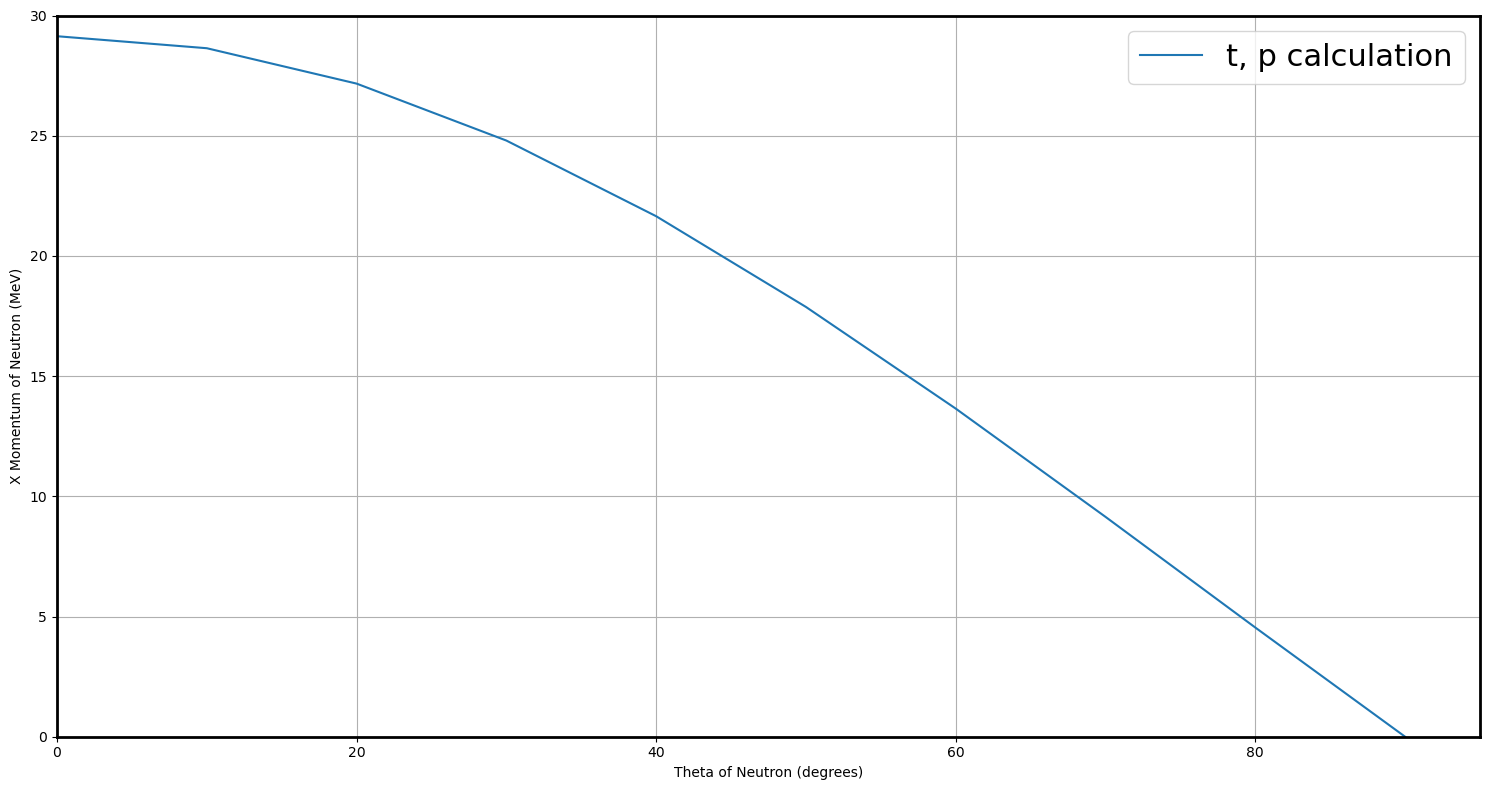

In [8]:
#Plot 
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes 
t=np.asarray (Theta) 
p=np.asarray (p)
ax1.plot(t,p,label='t, p calculation') 

ymin = 0
ymax = 30


plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0, 95) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'Theta of Neutron (degrees)')
ax1.set_ylabel('X Momentum of Neutron (MeV)')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [9]:
E = np.zeros(np.shape(Theta)) 
print(E)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
#Neutron Angles
print(Theta)
E=((1+np.tan(np.radians(Theta))**2)*p**2)/(2*m) 
print(E)

[ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]
[0.45132688 0.44954542 0.44429392 0.43584258 0.42461499 0.41115174
 0.39606653 0.38000031 0.36357878 0.34737765]


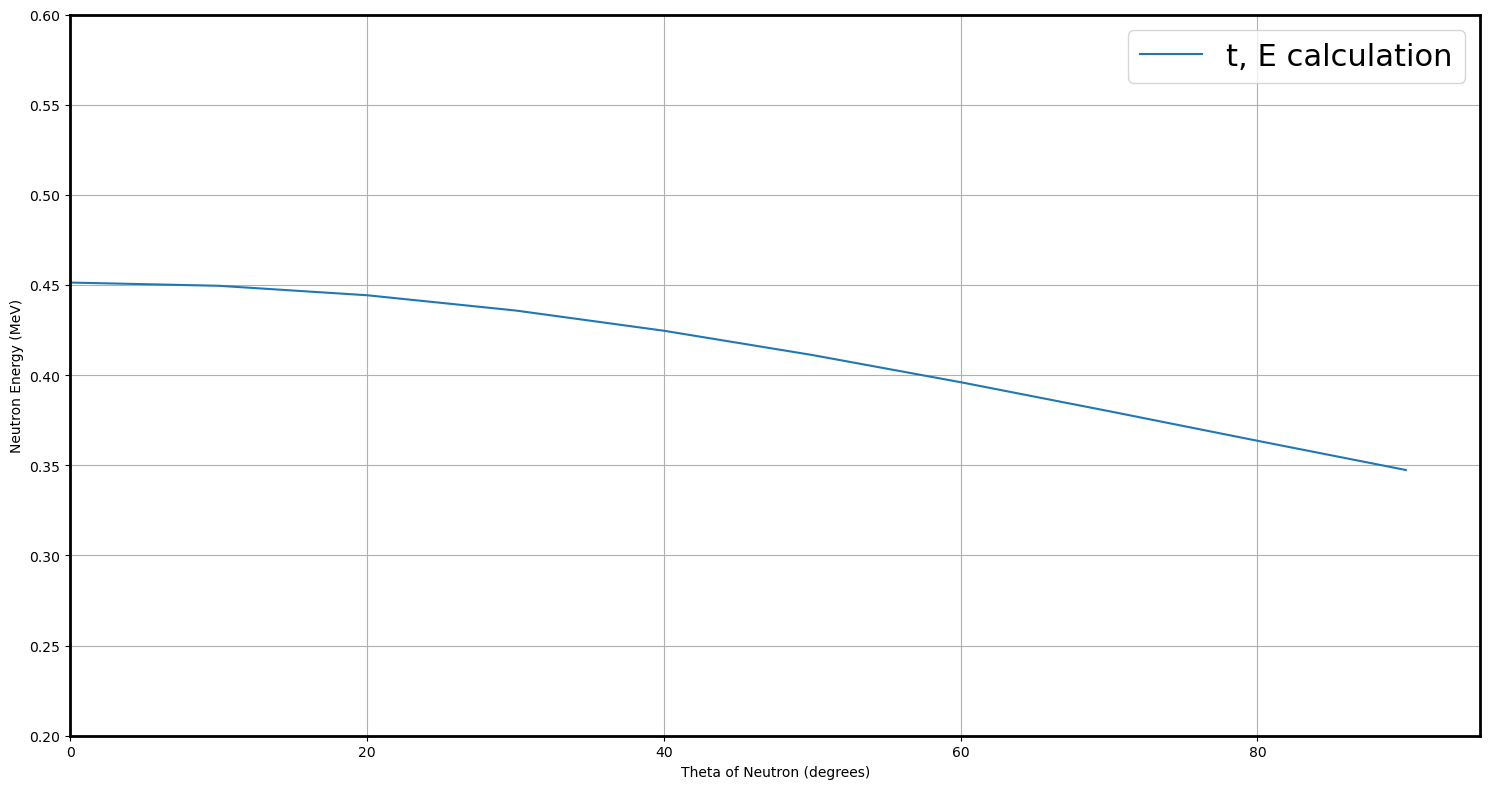

In [11]:
#Plot 
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes 
t=np.asarray (Theta) 
E=np.asarray (E)
ax1.plot(t,E,label='t, E calculation') 

ymin = 0.2
ymax = 0.6


plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0, 95) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'Theta of Neutron (degrees)')
ax1.set_ylabel('Neutron Energy (MeV)')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [12]:
Ea = 2 #meV
pxa=np.sqrt((2*ma)*Ea)

In [13]:
p2 = np.zeros(np.shape(Theta)) 
print(p2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
for i , t in enumerate(Theta):
    
    print(i,t)
    θ = t #degrees
    a =  (1 / (2 * M)) + (math.tan(math.radians(θ))**2 / (2 * M)) + (1 / (2 * m)) + (math.tan(math.radians(θ))**2 / (2 * m)) 
    b = -pxa / M 
    c = (pxa**2 / (2 * M)) - Ea - Q
    print(findRoots(a,b,c)[0])  
    p2[i] = findRoots(a,b,c)[0]

0 0.0
51.58960903335307
1 10.0
50.72770972209387
2 20.0
48.183018307864245
3 30.0
44.075244347717614
4 40.0
38.5932916528194
5 50.0
31.98074542980783
6 60.0
24.518129026681397
7 70.0
16.503998202396
8 80.0
8.236912929702696
9 90.0
2.853620908375374e-15


In [15]:
print(p2)

[5.15896090e+01 5.07277097e+01 4.81830183e+01 4.40752443e+01
 3.85932917e+01 3.19807454e+01 2.45181290e+01 1.65039982e+01
 8.23691293e+00 2.85362091e-15]


In [16]:
E2 = np.zeros(np.shape(Theta)) 
print(E2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
print(Theta)
E2=((1+np.tan(np.radians(Theta))**2)*p2**2)/(2*m) 
print(E2)

[ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]
[1.41478193 1.41043352 1.3975952  1.37687091 1.34921369 1.31585247
 1.27820253 1.23777012 1.19606153 1.15450515]


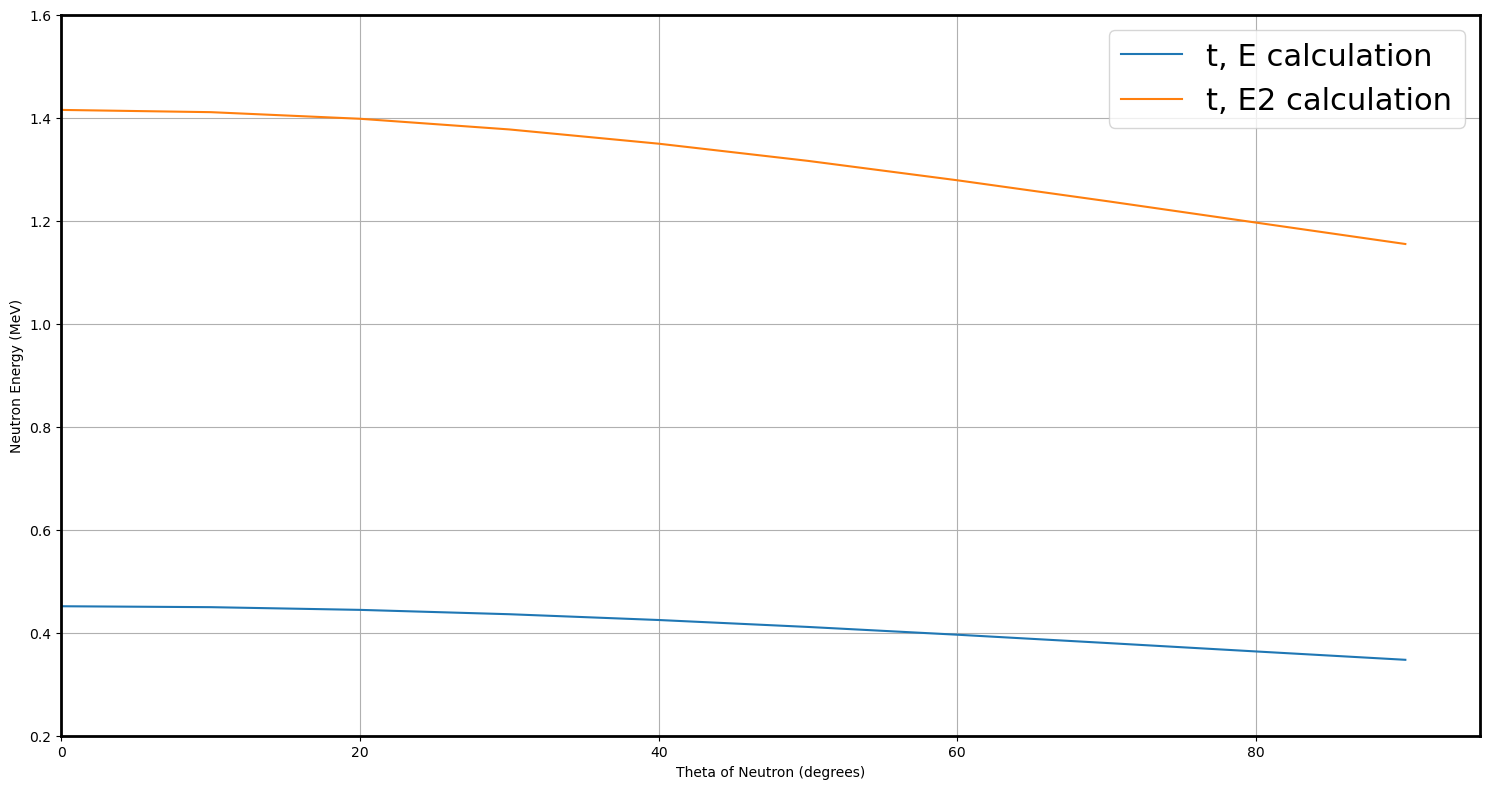

In [20]:
#Plot 
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes 
t=np.asarray (Theta) 
Ea=np.asarray (E)
ax1.plot(t,E,label='t, E calculation') 

ax1.plot(t,E2,label='t, E2 calculation') 

ymin = 0.2
ymax = 1.6


plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0, 95) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'Theta of Neutron (degrees)')
ax1.set_ylabel('Neutron Energy (MeV)')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()